# <h1><center>MODELOVANJE TEMA TVITOVA DEPRESIVNIH TVITERAŠA UZ POMOĆ LATENTNE DIRIČLETOVE ALOKACIJE (LDA)</center></h1>

- <span style="color:green">**SEMINARSKI RAD/ISPIT (Septembar, 2024. godine):**</span>
        - Predmet: Odabrane teme savremene statistike;
        - Student: Isidora Gatarić.

<span style="color:red">**i) UČITAVANJE SETA PODATAKA i EKSPLORATORNA ANALIZA PODATAKA (EDA):**</span>

In [1]:
# Učitavamo Python pakete koji su nam potrebni za ove početne korake
import pandas as pd
import seaborn as sns

C:\Users\isidora.gataric\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\isidora.gataric\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Učitavamo set podataka i prikazujemo zglavlje
dataset = pd.read_csv("C:\\Users\\isidora.gataric\\Desktop\\Mental-Health-Twitter.csv").drop(['Unnamed: 0'],axis=1)
dataset.head(5)

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
# Informišemo se o varijabalama/merama/features koje imamo u setu podataka
dataset.columns.to_list()

['post_id',
 'post_created',
 'post_text',
 'user_id',
 'followers',
 'friends',
 'favourites',
 'statuses',
 'retweets',
 'label']

In [4]:
# Infomiršemo se o tome koliko imamo slučajeva (redova) u setu podataka, odnosno koliko varijabli (kolone) imamo u setu podataka
# INT64 (intiger); FLOAT64 (decimale); OBJECT (string)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       20000 non-null  int64 
 1   post_created  20000 non-null  object
 2   post_text     20000 non-null  object
 3   user_id       20000 non-null  int64 
 4   followers     20000 non-null  int64 
 5   friends       20000 non-null  int64 
 6   favourites    20000 non-null  int64 
 7   statuses      20000 non-null  int64 
 8   retweets      20000 non-null  int64 
 9   label         20000 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# Varijablu "post_creted" smo konvertovali u datum, jer je u izvorno obliku bila prepoznata kao string
dataset['post_created'] = pd.to_datetime(dataset['post_created'])
dataset.info()
# Konvertovao je varijablu "post_created" iz stringa u datum

C:\Users\isidora.gataric\AppData\Local\Temp\ipykernel_22596\4040559708.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['post_created'] = pd.to_datetime(dataset['post_created'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   post_id       20000 non-null  int64              
 1   post_created  20000 non-null  datetime64[ns, UTC]
 2   post_text     20000 non-null  object             
 3   user_id       20000 non-null  int64              
 4   followers     20000 non-null  int64              
 5   friends       20000 non-null  int64              
 6   favourites    20000 non-null  int64              
 7   statuses      20000 non-null  int64              
 8   retweets      20000 non-null  int64              
 9   label         20000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(8), object(1)
memory usage: 1.5+ MB


In [6]:
# Pre nego što krenemo sa analizom izbacićemo duplikate (duplirane ID postova), imamo ih 119!
dataset.duplicated(["post_id"]).sum()

119

In [7]:
# Pošto na Kaggle piše da su ovo tvitovi istih ljudi, da ima malo user-a, uradićemo unique da vidimo koliko ih ima
dataset['user_id'].nunique()

72

In [8]:
# Izbacujemo duplirane postove (po njihovom "post_id")
dataset = dataset.drop_duplicates(["post_id"])
dataset

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,2017-01-12 00:05:22+00:00,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [9]:
# Pogledaćemo deskriptivne pokazatelje za numeričke varijable
dataset.describe()
# Imajući u vidu to da se set deli na depresivne i nedepresivne, tako ćemo ih i mi izdeliti u ovom segmentu deskriptivne statistike

,post_id,user_id,followers,friends,favourites,statuses,retweets,label
count,1.988100e+04,1.988100e+04,19881.000000,19881.000000,19881.000000,1.988100e+04,19881.000000,19881.000000
mean,6.875462e+17,3.546838e+16,900.870831,783.350988,6397.894019,4.438273e+04,1442.819828,0.500075
std,1.707069e+17,1.605695e+17,1904.632001,1839.771689,8394.485708,1.408054e+05,15161.298448,0.500013
min,3.555966e+09,1.472438e+07,0.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,5.931752e+17,3.242944e+08,177.000000,211.000000,243.000000,5.129000e+03,0.000000,0.000000
50%,7.186822e+17,1.052122e+09,476.000000,561.000000,2752.000000,1.325100e+04,0.000000,1.000000
75%,8.153132e+17,2.285923e+09,1197.000000,701.000000,8229.000000,5.289200e+04,1.000000,1.000000
max,8.194574e+17,7.631825e+17,28614.000000,28514.000000,39008.000000,1.063601e+06,839540.000000,1.000000


[Text(0.5, 0, 'Kategorija (Nedepresivni/Depresivni)'),
 Text(0, 0.5, 'Broj pratilaca')]

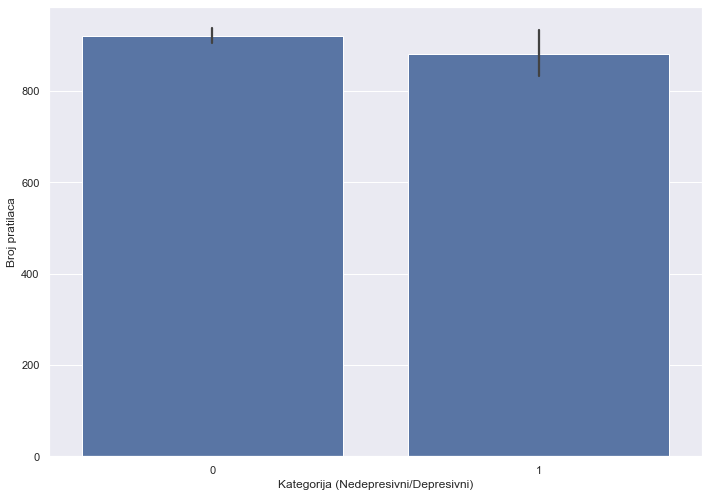

In [10]:
# Prebrajamo ko ima više prijatelja depresivni ili nedepresivni tviteraši
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(y='followers',x='label',data=dataset)
g.set(xlabel='Kategorija (Nedepresivni/Depresivni)', ylabel='Broj pratilaca')
# Note: 1 su depresivni, 0 su nedepresivni

[Text(0.5, 0, 'Kategorija (Nedepresivni/Depresivni)'),
 Text(0, 0.5, 'Broj prijatelja')]

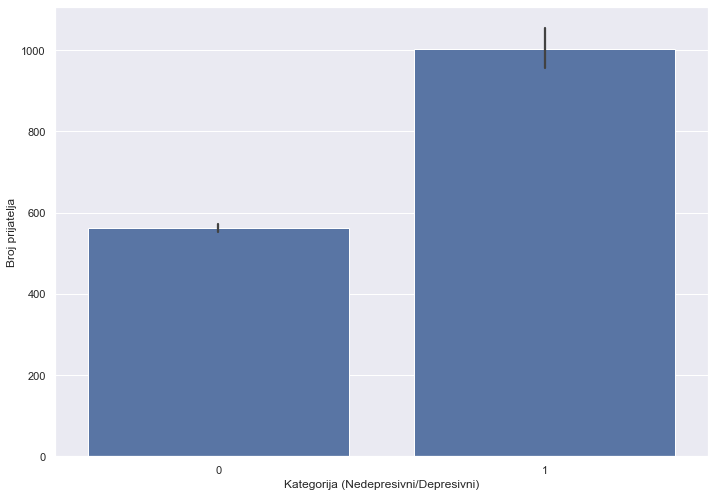

In [11]:
# Prebrajamo ko ima više prijatelja depresivni ili nedepresivni tviteraši
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(y='friends',x='label',data=dataset)
g.set(xlabel='Kategorija (Nedepresivni/Depresivni)', ylabel='Broj prijatelja')
# Note: 1 su depresivni, 0 su nedepresivni

[Text(0.5, 0, 'Kategorija (Nedepresivni/Depresivni)'),
 Text(0, 0.5, 'Favoriti')]

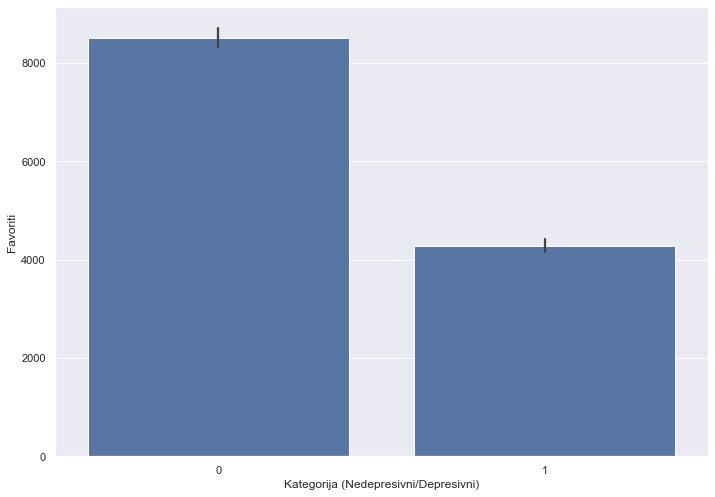

In [12]:
# Prebrajamo ko ima više favorita (org. favourites) depresivni ili nedepresivni tviteraši
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(y='favourites',x='label',data=dataset)
g.set(xlabel='Kategorija (Nedepresivni/Depresivni)', ylabel='Favoriti')
# Note: 1 su depresivni, 0 su nedepresivni

[Text(0.5, 0, 'Kategorija (Nedepresivni/Depresivni)'),
 Text(0, 0.5, 'Broj statusa')]

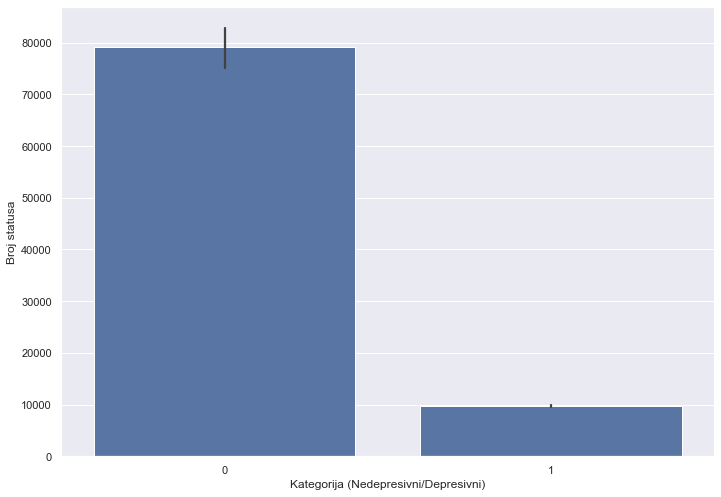

In [13]:
# Prebrajamo ko ima više statusa depresivni ili nedepresivni tviteraši
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(y='statuses',x='label',data=dataset)
g.set(xlabel='Kategorija (Nedepresivni/Depresivni)', ylabel='Broj statusa')
# Note: 1 su depresivni, 0 su nedepresivni

[Text(0.5, 0, 'Kategorija (Nedepresivni/Depresivni)'),
 Text(0, 0.5, 'Retvitovi')]

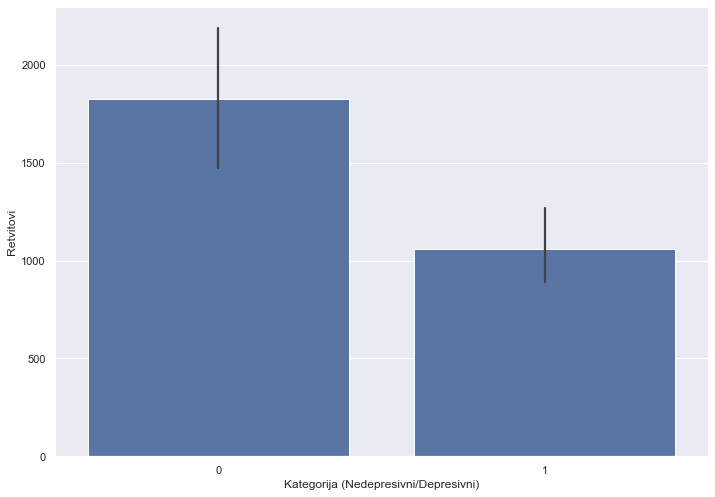

In [14]:
# Prebrajamo ko ima više statusa depresivni ili nedepresivni tviteraši
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(y='retweets',x='label',data=dataset)
g.set(xlabel='Kategorija (Nedepresivni/Depresivni)', ylabel='Retvitovi')
# Note: 1 su depresivni, 0 su nedepresivni

[Text(0.5, 0, 'Godina postovanja'), Text(0, 0.5, 'Broj tvitova')]

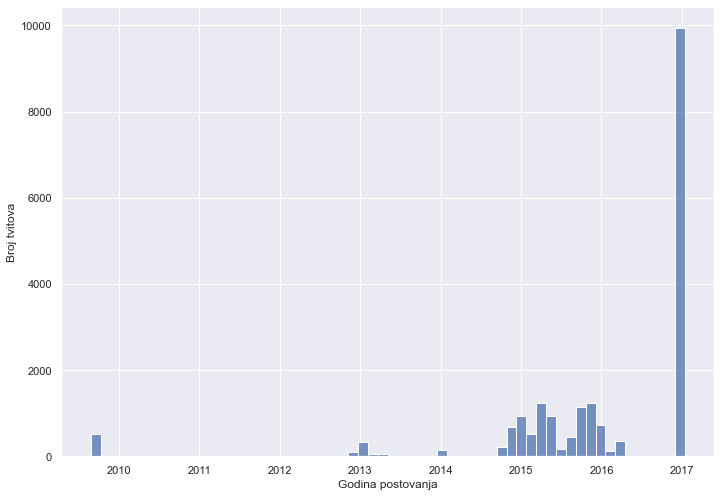

In [15]:
# Gledamo vremenski raspon tvitova
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.histplot(data=dataset, x="post_created")
g.set(xlabel='Godina postovanja', ylabel='Broj tvitova')

In [16]:
# Malo smo stekli uvid u same podatke kojima se raspolaže, sada ćemo podeliti set na "depresivne" i "nedepresivne" i dalje nastvljamo analizu samo na depresivnim ispitanicima
depresivni = dataset.loc[dataset['label'].isin([1])]
depresivni

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,587768995559772160,2015-04-14 00:07:03+00:00,"RT @CSLewisU: ""We all agreed that forgiveness ...",2766067037,78,175,664,1148,217,1
9996,587719358522101760,2015-04-13 20:49:49+00:00,Can't believe it's been a year. #blastyblast #...,2766067037,78,175,664,1148,0,1
9997,587715060790734848,2015-04-13 20:32:44+00:00,"One year ago, a journey began. I never knew th...",2766067037,78,175,664,1148,0,1
9998,587065862944874497,2015-04-12 01:33:03+00:00,I found some new hammocking friends in the par...,2766067037,78,175,664,1148,0,1


<span style="color:red">**ii) PRE-PROCESUIRANJE TEKSTA:**</span>

In [17]:
# Importujem dodatne pakete koji mi trebaju
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
# Delim setpodataka (depresivni) na train i test subsetove
X=depresivni.drop(columns=['post_id'])
y=depresivni['post_id']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, test_size=0.20, shuffle=True)
X_train

,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
4820,2014-09-23 15:53:48+00:00,"please, dont even forget. I will put my gun on...",1015648590,119,109,757,1300,0,1
3365,2015-10-17 03:09:51+00:00,RT @AaronCarpenter: It's actually cold😍😍,3045320288,1505,2082,6920,13251,2738,1
2532,2016-03-22 15:29:58+00:00,RT @CBSThisMorning: JUST IN: Photos of three M...,325328455,3185,1447,1250,5186,266,1
4219,2015-01-08 22:05:22+00:00,@maidotsuki nice opinion,2285922931,43,59,4301,12309,0,1
7519,2016-03-07 23:55:16+00:00,@TheSilentG You rub it in by declaring yoursel...,14724376,350,207,8276,22207,0,1
...,...,...,...,...,...,...,...,...,...
3939,2015-01-22 22:59:07+00:00,@unknownoddity have you been feeling ok lately?,2285922931,43,59,4301,12309,0,1
9677,2014-10-27 19:33:38+00:00,I'm too raw for all this talk cuz ima walk bef...,1052121847,177,687,3066,8133,0,1
7109,2009-08-28 02:59:13+00:00,"Vertigo And Diarrhea, Whats Wrong With Me? htt...",60868031,1768,532,3,5720,0,1
7434,2016-03-15 13:39:26+00:00,RT @alythomson: Sexual assault cases spark cal...,14724376,350,207,8276,22207,2,1


In [19]:
# Setujemo parametre da vidimo full tekst u setu podataka
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)

In [20]:
# Pogledaćemo koliko imamo unikatnih ispitanika obeleženih kao depresivni
depresivni['user_id'].nunique()
# Ima ih više nego nepresivnih, to je super vest

54

In [21]:
# Učitavamo pakete koji nam trebaju i pravimo funkciju kojom ćemo da pročistimo tekst iz seta podataka
import re
import nltk
import emoji
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

# Pravimo Tokinezer
def tokenize(text):
    text = emoji.replace_emoji(text, replace='')    # Čisto smajlije i slične karaktere
    text = re.sub(r"http\S+", "", text)             # Čistimo URL
    text = re.sub(r"[^\w\s]", "", text)             # Čistimo ove specijalne karaktere
    tokens = [word for word in nltk.word_tokenize(text) if len(word)>3]   # Ovde želimo da izbacimo predloge, priloge i sl. (koliko je moguće)
    stems = [stemmer.stem(item) for item in tokens]                       # Stimer
    return tokens

In [22]:
# Radimo vektorizaciju reči, da bismo moglida ih prikažemo u vektorskom prostoru (grupisanje distribucija po sličnosti)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_train.post_text)
# vectorizer_tf.get_feature_names_out()[100:200]

<span style="color:red">**iii) MODELOVANJE TEKSTA LDA (TRENING PODACI):**</span>

In [23]:
# Učitavamo šta nam još treba od paketa i krećemo da pravimo LDA model na trening setu podataka
from sklearn import decomposition

# Default je 10 tema, random state je takođe po default 42, kao i sve preostale vrednosti
lda = decomposition.LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', learning_offset=50, n_jobs=1, random_state=42)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

W1.shape

(7953, 10)

In [24]:
# Printamo po 15 reprezentnih reči za svaku od tema
num_words = 15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

# topics

In [25]:
# Reči iz korpusa se po sličnosti dodeljuju nekoj od 10 tema (argmax)

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.post_text))]

df_doc_topic_pos = pd.DataFrame(np.round(W1,2),columns=colnames,index=docnames)
significanttopic = np.argmax(df_doc_topic_pos.values,axis=1)

df_doc_topic_pos['dominant_topic'] = significanttopic

df_doc_topic_pos

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.03,0.03,0.70,0.03,0.03,0.03,0.03,0.03,0.03,0.03,2
Doc1,0.03,0.03,0.03,0.77,0.03,0.03,0.03,0.03,0.03,0.03,3
Doc2,0.01,0.01,0.01,0.01,0.01,0.11,0.81,0.01,0.01,0.01,6
Doc3,0.03,0.03,0.03,0.03,0.03,0.77,0.03,0.03,0.03,0.03,5
Doc4,0.01,0.01,0.01,0.79,0.01,0.01,0.01,0.01,0.12,0.01,3
...,...,...,...,...,...,...,...,...,...,...,...
Doc7948,0.27,0.03,0.03,0.03,0.03,0.53,0.03,0.03,0.03,0.03,5
Doc7949,0.02,0.02,0.02,0.02,0.02,0.22,0.02,0.02,0.02,0.62,9
Doc7950,0.02,0.02,0.22,0.02,0.02,0.22,0.02,0.02,0.42,0.02,8
Doc7951,0.01,0.01,0.60,0.01,0.01,0.22,0.11,0.01,0.01,0.01,2


In [26]:
# Čuvamo ovu tabelu kao novi set podataka, ako nam zatreba za nešto
df_doc_topic_pos.to_csv("C:\\Users\\isidora.gataric\\Desktop\\lda_features_train.csv")

In [27]:
# Importujemo pakete koji su potrebni za vizualizaciju
import pyLDAvis
import pyLDAvis.lda_model

In [28]:
# Pravimo interaktivni grafik sa podacima o temama, rečima u okviru istih i ostalih parametara
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf_vectors, vectorizer_tf)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.251968  0.058538       1        1  16.518883
5     -0.245659  0.062063       2        1  14.422022
7      0.124254  0.295607       3        1  13.369413
4      0.000899 -0.098553       4        1   9.431474
6      0.102037  0.026012       5        1   9.157152
8      0.020257 -0.110782       6        1   8.804559
1      0.119674  0.042288       7        1   7.681148
3      0.056571 -0.098777       8        1   7.208641
9      0.047759 -0.088556       9        1   6.833898
2      0.026176 -0.087840      10        1   6.572811, topic_info=            Term        Freq       Total Category  logprob  loglift
2910  depression  582.000000  582.000000  Default  30.0000  30.0000
4537        just  348.000000  348.000000  Default  29.0000  29.0000
5333   misslusyd  217.000000  217.000000  Default  28.0000  28.0000
4826        like  357.000000  357.000000  Default  27.0000  27.0000
5887      people  221.000000  221.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1127   beautiful   21.994457   35.800130  Topic10  -4.8917   2.2351
1829      causes   12.762905   16.447645  Topic10  -5.4360   2.4686
8068        stay   16.155084   29.564437  Topic10  -5.2003   2.1179
3169        dont   26.456982  298.512543  Topic10  -4.7070   0.2989
6283      pretty   14.355970   40.504776  Topic10  -5.3184   1.6850

[417 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
154       9  0.996110             5sos
156       1  0.975259       5sos_daily
160       1  0.991680   5sosfamupdater
168       9  0.985347      5sostumblrx
200       9  0.909619  _5sosfamupdates
...     ...       ...              ...
9908      8  0.616966             year
9909      1  0.978656            years
9924      4  0.962081        yesterday
9929      5  0.943151             yoga
9952      2  0.996398            youre

[476 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 8, 5, 7, 9, 2, 4, 10, 3])

<span style="color:red">**iv) MODELOVANJE TEKSTA LDA (TEST PODACI):**</span>

In [29]:
# Radimo vektorizaciju reči, da bismo moglida ih prikažemo u vektorskom prostoru (grupisanje distribucija po sličnosti)
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words='english', max_df=0.75, max_features=10000, use_idf=False, norm=None)
tf_vectors = vectorizer_tf.fit_transform(X_test.post_text)
# vectorizer_tf.get_feature_names_out()[100:200]

In [30]:
# Default je 10 tema, random state je takođe po default 42, kao i sve preostale vrednosti
lda = decomposition.LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', learning_offset=50, n_jobs=1, random_state=42)

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

W1.shape

(1989, 10)

In [31]:
# Printamo po 15 reprezentnih reči za svaku od tema
num_words = 15

vocab = np.array(vectorizer_tf.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

# topics

In [32]:
# Reči iz korpusa se po sličnosti dodeljuju nekoj od 10 tema (argmax)

colnames = ["Topic" + str(i) for i in range(lda.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_test.post_text))]

df_doc_topic_pos = pd.DataFrame(np.round(W1,2),columns=colnames,index=docnames)
significanttopic = np.argmax(df_doc_topic_pos.values,axis=1)

df_doc_topic_pos['dominant_topic'] = significanttopic

df_doc_topic_pos

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.02,0.02,0.82,0.02,0.02,0.02,0.02,0.02,0.02,0.02,2
Doc1,0.01,0.01,0.91,0.01,0.01,0.01,0.01,0.01,0.01,0.01,2
Doc2,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,6
Doc3,0.03,0.03,0.03,0.03,0.03,0.03,0.77,0.03,0.03,0.03,6
Doc4,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.70,9
...,...,...,...,...,...,...,...,...,...,...,...
Doc1984,0.02,0.02,0.02,0.02,0.02,0.85,0.02,0.02,0.02,0.02,5
Doc1985,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.82,9
Doc1986,0.12,0.80,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1
Doc1987,0.02,0.02,0.62,0.02,0.22,0.02,0.02,0.02,0.02,0.02,2


In [33]:
# Čuvamo ovu tabelu kao novi set podataka, ako nam zatreba za nešto
df_doc_topic_pos.to_csv("C:\\Users\\isidora.gataric\\Desktop\\lda_features_test.csv")

In [34]:
# Pravimo interaktivni grafik sa podacima o temama, rečima u okviru istih i ostalih parametara
pyLDAvis.enable_notebook()
pyLDAvis.lda_model.prepare(lda, tf_vectors, vectorizer_tf)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.245974 -0.097917       1        1  16.886864
1     -0.157634 -0.200505       2        1  16.040003
6      0.020555 -0.010741       3        1  12.062904
5      0.026794 -0.029473       4        1  11.188446
2     -0.013683  0.084243       5        1  10.968773
9     -0.015220  0.120267       6        1  10.354649
0     -0.025863  0.030647       7        1   5.872035
7     -0.025200  0.027000       8        1   5.789162
8     -0.022878  0.045877       9        1   5.612493
3     -0.032845  0.030602      10        1   5.224671, topic_info=            Term        Freq       Total Category  logprob  loglift
1190  depression  120.000000  120.000000  Default  30.0000  30.0000
2306        just   62.000000   62.000000  Default  29.0000  29.0000
1297        dont   58.000000   58.000000  Default  28.0000  28.0000
2816   misslusyd   50.000000   50.000000  Default  27.0000  27.0000
4434        time   36.000000   36.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
3391     problem    1.832896    4.080644  Topic10  -5.8111   2.1514
1772     getting    1.755991    6.918502  Topic10  -5.8540   1.5806
1966     healthy    1.728229    7.978666  Topic10  -5.8699   1.4221
709       cancer    1.512401    4.623158  Topic10  -6.0033   1.8344
3944       sleep    1.372925   15.841229  Topic10  -6.1001   0.5061

[491 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
24        8  0.800858            2015
44        4  0.969760            5sos
46        3  0.087432      5sos_daily
46        4  0.786889      5sos_daily
48        4  0.904110  5sosfamupdater
...     ...       ...             ...
4921      3  0.163416           youre
4921      4  0.032683           youre
4921      5  0.228782           youre
4922      2  0.966253           youth
4935      9  0.520373       zenhabits

[706 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 7, 6, 3, 10, 1, 8, 9, 4])

# <h1><center>KRAJ! :-)</center></h1>